In [1]:
%pylab inline
import numpy as np
import scipy.misc as sm
import scipy.special as ss
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lpKernel(N, freq):
#
# Lowpass filter kernel generator
#
# N is the filter half-size, must be odd
# freq is the normalised cutoff frequency
#
# Returns the filter kernel of size (2N+1,2N+1)
#
    num = 2*N + 1
    result = np.zeros((num,num))
    for m in range(N+1):
        i = m+N
        im = -m+N
        for n in range(N+1):
            j = n+N
            jm = -n+N
            if (m==0 and n==0):
                result[i,j] = np.pi*freq**2/4
            else:
                pandq = m%2 + n%2
                mandn = np.sqrt(m*m+n*n)
                val = (sm.factorial2(N)**4 * np.pi**pandq * freq * ss.jn(1,np.pi * freq * mandn)) / ( 2**(pandq+1) * sm.factorial2(N+m) * sm.factorial2(N-m) * sm.factorial2(N+n) *sm.factorial2(N-n) *mandn )  
                result[i,j] = val
                result[j,i] = val
                result[im,j] = val
                result[i,jm] = val
                result[im,jm] = val
                
    return result/np.sum(result)

def hpKernel(N, freq):
#
# Highpass circular symmetric filter kernel generator
#
# N is the filter half-size, must be odd
# freq is the normalised cutoff frequency
#
# Returns the filter kernel of size (2N+1,2N+1)
#
    result = lpKernel(N, freq)
    for m in range(-N,N+1):
        i = m+N
        for n in range(-N,N+1):
            j = n+N
            if (m==0 and n==0):
                result[i,j] = 1-result[i,j]
            else:
                result[i,j] = -result[i,j]
    return result

def brKernel(N, freq, halfwidth=0.1):
#
# Band Reject circular symmetric filter kernel generator
#
# N is the filter half-size, must be odd
# freq is the normalised centre frequency of the reject band
# halfwidth controls the aperture of the reject band to freq +/- halfwidth
#
# Returns the filter kernel of size (2N+1,2N+1)
#
    kernel_lp = lpKernel(N, freq-halfwidth)
    kernel_hp = hpKernel(N, freq+halfwidth)
    result = kernel_lp + kernel_hp
    return result

def bpKernel(N, freq , halfwidth=0.1):
#
# Bandpass circular symmetric filter kernel generator
#
# N is the filter half-size, must be odd
# freq is the normalised centre frequency of the pass band
# halfwidth controls the aperture of the pass band to freq +/- halfwidth
#
# Returns the filter kernel of size (2N+1,2N+1)
#
    result = brKernel(N, freq, halfwidth)
    for m in range(-N,N+1):
        i = m+N
        for n in range(-N,N+1):
            j = n+N
            if (m==0 and n==0):
                result[i,j] = 1-result[i,j]
            else:
                result[i,j] = -result[i,j]
    return result



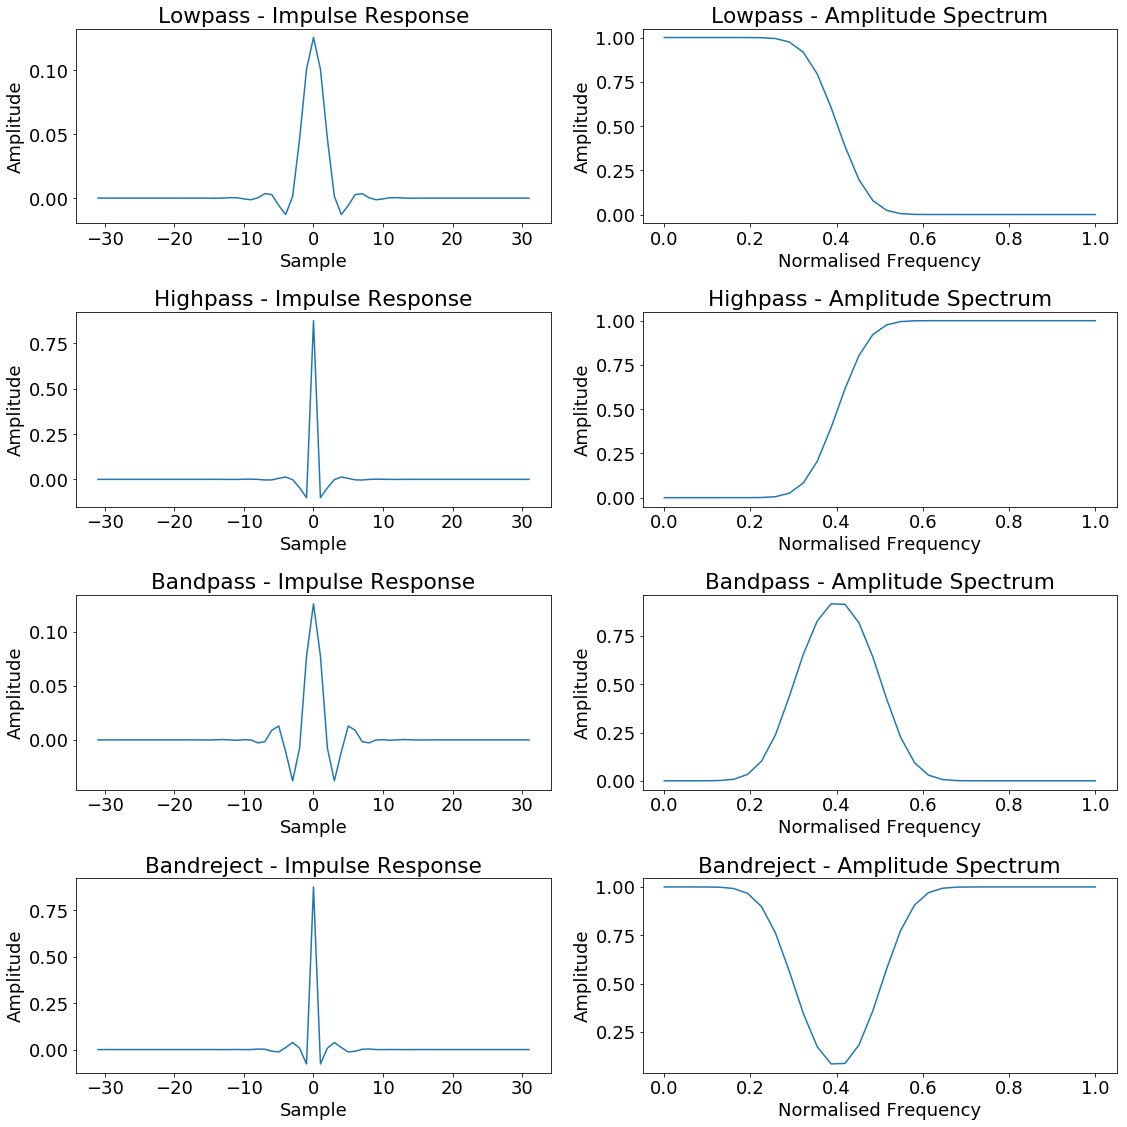

In [3]:
N = 31

matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 4, 2, figsize=(16,16) )

kernel = lpKernel(N, 0.4)
amp2D = np.fft.fftshift(np.abs(np.fft.rfft2(kernel)),axes=0)
axes[0,0].plot(np.linspace(-N,N,2*N+1), kernel[:,N])
axes[0,0].set_xlabel('Sample')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].set_title('Lowpass - Impulse Response')
axes[0,1].plot(np.linspace(0,1,N+1),amp2D[N,:])
axes[0,1].set_xlabel('Normalised Frequency')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].set_title('Lowpass - Amplitude Spectrum')

kernel = hpKernel(N, 0.4)
amp2D = np.fft.fftshift(np.abs(np.fft.rfft2(kernel)),axes=0)
axes[1,0].plot(np.linspace(-N,N,2*N+1), kernel[:,N])
axes[1,0].set_xlabel('Sample')
axes[1,0].set_ylabel('Amplitude')
axes[1,0].set_title('Highpass - Impulse Response')
axes[1,1].plot(np.linspace(0,1,N+1),amp2D[N,:])
axes[1,1].set_xlabel('Normalised Frequency')
axes[1,1].set_ylabel('Amplitude')
axes[1,1].set_title('Highpass - Amplitude Spectrum')

kernel = bpKernel(N, 0.4)
amp2D = np.fft.fftshift(np.abs(np.fft.rfft2(kernel)),axes=0)
axes[2,0].plot(np.linspace(-N,N,2*N+1), kernel[:,N])
axes[2,0].set_xlabel('Sample')
axes[2,0].set_ylabel('Amplitude')
axes[2,0].set_title('Bandpass - Impulse Response')
axes[2,1].plot(np.linspace(0,1,N+1),amp2D[N,:])
axes[2,1].set_xlabel('Normalised Frequency')
axes[2,1].set_ylabel('Amplitude')
axes[2,1].set_title('Bandpass - Amplitude Spectrum')

kernel = brKernel(N, 0.4)
amp2D = np.fft.fftshift(np.abs(np.fft.rfft2(kernel)),axes=0)
axes[3,0].plot(np.linspace(-N,N,2*N+1), kernel[:,N])
axes[3,0].set_xlabel('Sample')
axes[3,0].set_ylabel('Amplitude')
axes[3,0].set_title('Bandreject - Impulse Response')
axes[3,1].plot(np.linspace(0,1,N+1),amp2D[N,:])
axes[3,1].set_xlabel('Normalised Frequency')
axes[3,1].set_ylabel('Amplitude')
axes[3,1].set_title('Bandreject - Amplitude Spectrum')


fig.tight_layout()